# <font color=blue><div align="center">TD 7</div></font>

# <font color=blue><div align="center">06-03-2023</div></font>

In [4]:
# Modules de base
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Module relatif à Gurobi
from gurobipy import *

Lecteurs | Dimension 1 | Dimension 2 | Dimension 3 |
:--:|:----------:|:-------------:|:------:|
1 | 10 | 50 | 70 |
2 | 34 | 56 | 84 |
3 | 40 | 90 | 45 |
4 | 30 | 10 | 70 |
5 | 60 | 80 | 45 |
6 | 49 | 56 | 54 |

## Question 3 :

On rappelle ci-dessous l'ensemble des informations qui caractérisent $\mathcal(D)$ le polyèdre des valeurs de poids compatibles :

- Le lecteur $1$ est au moins aussi attractif que le lecteur $4$
- Le lecteur $5$ n'est pas pire que le lecteur $3$,
- Le lecteur $2$ est au moins aussi bien que le lecteur $6$.
- *''Aucune des 3 dimensions ne peut contribuer de plus de la moitié de l'évaluation globale''*

Ci-dessous (est fournie) la représentation graphique de $D$ :

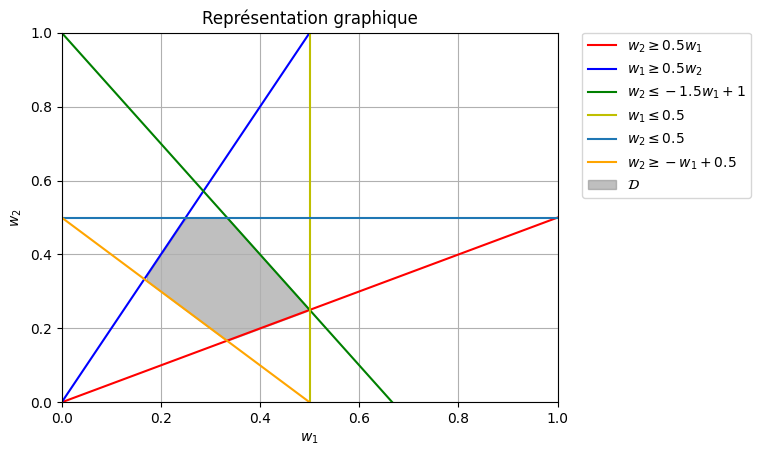

In [2]:
# -- Construction des droites associées aux contraintes --
w1 = np.linspace(0, 1, 100)
w2 = np.linspace(0, 1, 100)
# poids
# plt.plot(w1,1-w1,'grey',lw='1')
# (C1) : le lecteur 1 est au moins aussi attractif que le lecteur 4
w2_C1 = 0.5*w1
# (C2) : le lecteur 5 n’est pas pire que le lecteur 3
w2_C2 = 2*w1
# (C3) : le lecteur 2 est au moins aussi bien que le lecteur 6
w2_C3 = -1.5*w1 + 1



# -- Dessin des droites associées aux contraintes --
plt.plot(w1, w2_C1, 'r', label = '$w_2 \geq 0.5 w_1$')
plt.plot(w1, w2_C2, 'b', label = '$w_1 \geq 0.5 w_2$')
plt.plot(w1, w2_C3, 'g', label = '$w_2 \leq -1.5 w_1 + 1$')
# aucune des 3 dimensions ne peut contribuer de plus de la moitié de l’évaluation globale
plt.axvline(x=0.5, color='y', label='$w_1 \leq 0.5$')
w2_bound = 0.5 + 0*w1
plt.plot(w1, w2_bound, label='$w_2 \leq 0.5$')
w3_bound = -w1 + 0.5
plt.plot(w1, w3_bound, 'orange', label = "$w_2 \geq -w_1 + 0.5$")


# -- Dessin de la région des solutions réalisables --
limitsup = np.minimum(w2_C2, w2_C3)
limitsup2 = np.minimum(limitsup, w2_bound)
limitinf = np.maximum(w3_bound, w2_C1)
plt.fill_between(w1, limitsup2, limitinf, where = (w2_C2 > w3_bound) & (w2_C1 < w2_C3), color = 'grey', alpha = 0.5, label = "$\mathcal{D}$")



# -- Définition des paramètres du graphique --
plt.grid()
plt.xlim((0, 1)) 
plt.ylim((0, 1))
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
plt.title('Représentation graphique')


# -- Affichage du graphique --
plt.show()

## Question 7 :

Implémenter (en utilisant la bibliothèque *gurobipy*) les programmes mathématiques *Prog<sub>1</sub>* et *Prog<sub>2</sub>*.

<br></br>
Il s'agira notamment de :

- Définir les variables de décision desdits programmes
- Définir les contraintes caractérisant $D$
- Spécifier les objectifs correspondant à chacun d'eux.

In [3]:
# Lecteurs évalués sur 3 dimensions :
L = np.array([ [10, 50, 70],
               [34, 56, 84],
               [40, 90, 45],
               [30, 10, 70],
               [60, 80, 45],
               [49, 56, 54] ])


In [15]:
# Implémentation Python

def optimiser_preference(L, i, j):
    # Initialisation du modèle
    m = Model("comparaison_lecteurs")
    
    # Définition des variables de décision pour les poids
    poids = m.addVars(3, name="poids", lb=0)
    
    # Ajout de la contrainte que la somme des poids = 1
    m.addConstr(poids.sum() == 1, "somme_poids")
    
    # Définition des fonctions objectif pour Prog1 et Prog2
    gw_i = quicksum(L[i,k] * poids[k] for k in range(3))
    gw_j = quicksum(L[j,k] * poids[k] for k in range(3))
    
    # Prog1: Maximiser gw(i) - gw(j)
    m.setObjective(gw_i - gw_j, GRB.MAXIMIZE)
    m.params.outputflag = 0 # mode muet
    m.optimize()
    pref_i_j = m.objVal
    print("Score de Prog1 : ", pref_i_j)
    
    # Réinitialiser le modèle pour Prog2
    m.reset()
    
    # Prog2: Maximiser gw(j) - gw(i)
    m.setObjective(gw_j - gw_i, GRB.MAXIMIZE)
    m.optimize()
    pref_j_i = m.objVal
    print("Score de Prog2 : ",pref_j_i)
    
    # Analyse de la préférence
    if pref_j_i <= 0:
        print(f"Téléphone {i + 1} est préféré au Téléphone {j + 1}")
    elif pref_i_j <= 0:
        print(f"Téléphone {j + 1} est préféré au Téléphone {i + 1}")
    else:
        print(f"Aucune préférence claire entre les Lecteurs {i + 1} et {j + 1}")

# Exemple d'utilisation pour comparer les lecteurs 0 et 1
optimiser_preference(L, 0, 1)

for i in range(len(L)):
    for j in range(len(L)):
        if i != j:
            optimiser_preference(L, i, j)



Score de Prog1 :  -6.0
Score de Prog2 :  24.0
Téléphone 2 est préféré au Téléphone 1
Score de Prog1 :  -6.0
Score de Prog2 :  24.0
Téléphone 2 est préféré au Téléphone 1
Score de Prog1 :  25.0
Score de Prog2 :  40.0
Aucune préférence claire entre les Lecteurs 1 et 3
Score de Prog1 :  40.0
Score de Prog2 :  20.0
Aucune préférence claire entre les Lecteurs 1 et 4
Score de Prog1 :  25.0
Score de Prog2 :  50.0
Aucune préférence claire entre les Lecteurs 1 et 5
Score de Prog1 :  16.0
Score de Prog2 :  39.0
Aucune préférence claire entre les Lecteurs 1 et 6
Score de Prog1 :  24.0
Score de Prog2 :  -6.0
Téléphone 2 est préféré au Téléphone 1
Score de Prog1 :  39.0
Score de Prog2 :  34.0
Aucune préférence claire entre les Lecteurs 2 et 3
Score de Prog1 :  46.0
Score de Prog2 :  -4.0
Téléphone 2 est préféré au Téléphone 4
Score de Prog1 :  39.0
Score de Prog2 :  26.0
Aucune préférence claire entre les Lecteurs 2 et 5
Score de Prog1 :  30.0
Score de Prog2 :  15.0
Aucune préférence claire entre l

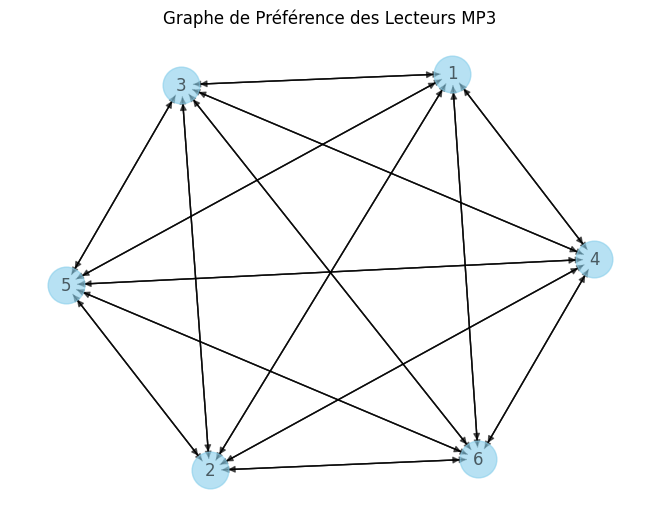

In [17]:
import matplotlib.pyplot as plt
import networkx as nx

# Création du graphe orienté
G = nx.DiGraph()

# Ajout des noeuds
for i in range(len(L)):
    G.add_node(i+1)

# Ajout des arcs basés sur les préférences
# Ici, vous devriez remplacer `resultats` par votre propre structure de données
# qui garde en mémoire les préférences identifiées
for i in range(len(L)):
    for j in range(len(L)):
        if i != j:
            # Simulons un résultat de préférence
            # Vous devrez adapter cette logique pour refléter vos résultats réels
            G.add_edge(i+1, j+1) # Ajouter un arc de i vers j si i est préféré à j

# Dessin du graphe
pos = nx.spring_layout(G)  # positions pour tous les noeuds
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", alpha=0.6)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, arrows=True)

plt.title("Graphe de Préférence des Lecteurs MP3")
plt.show()


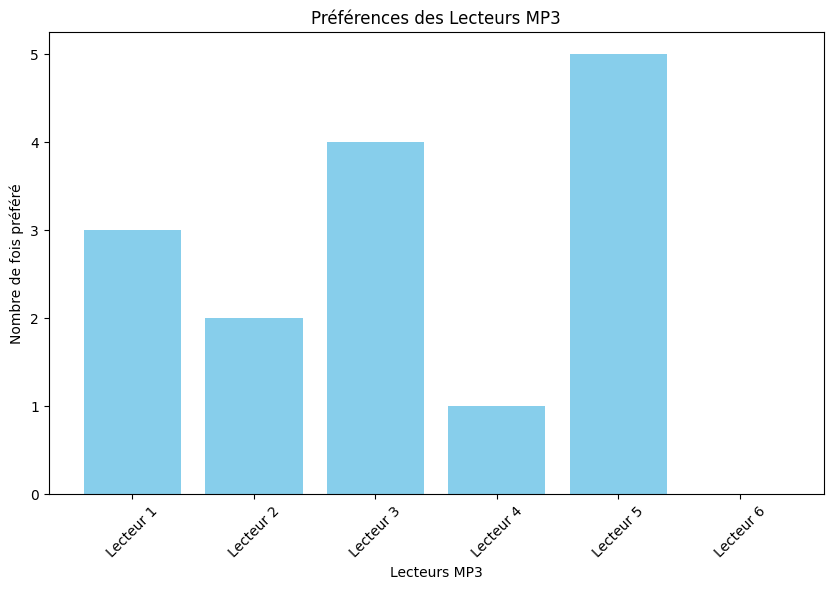

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Supposons que vous avez un dictionnaire `preferences` qui contient les résultats
# Par exemple, {0: 3, 1: 2, 2: 1, ...} où la clé est l'index du lecteur
# et la valeur est le nombre de fois où ce lecteur est préféré.

# Exemple de dictionnaire de préférences (à remplacer par vos résultats réels)
preferences = {0: 3, 1: 2, 2: 4, 3: 1, 4: 5, 5: 0}  # Exemple de données

# Noms des lecteurs pour les labels de l'axe X
lecteurs = [f'Lecteur {i+1}' for i in range(len(preferences))]

# Valeurs de préférences
valeurs = list(preferences.values())

# Création de l'histogramme
plt.figure(figsize=(10, 6))
plt.bar(lecteurs, valeurs, color='skyblue')

plt.xlabel('Lecteurs MP3')
plt.ylabel('Nombre de fois préféré')
plt.title('Préférences des Lecteurs MP3')
plt.xticks(rotation=45)
plt.show()


En déduire le préordre partiel sur les 6 lecteurs.